In [3]:
from components import *
from modular_network import Network
import mnist_loader, fashion_mnist_loader
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sci

In [4]:
mnist_train, mnist_val, mnist_test = mnist_loader.load_data_wrapper("../data/mnist.pkl.gz")

In [5]:
model = Network.load("../save/larger_network.json")

In [ ]:
def backprop_return(net, delta):
    for layer in reversed(net.layers):
        delta = layer.backprop(delta)
    return delta

def get_delta(net, image, Y):
    a_L = net.feedforward(np.array([image]))
    # unscaled delta^L
    delta = net.cost.derivative(a_L, Y)
    # backprop
    return backprop_return(net, delta)[0]

In [283]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
def forceNorm(x, xmin=0, xmax=1):
    return np.clip(x, xmin, xmax)
def pNorm(x, xmin=0, p=0.8):
    cutoff = p * np.max(x)
    return relu(x) / cutoff
def relu(x):
    return np.max([x, np.zeros(x.shape)], axis=0)

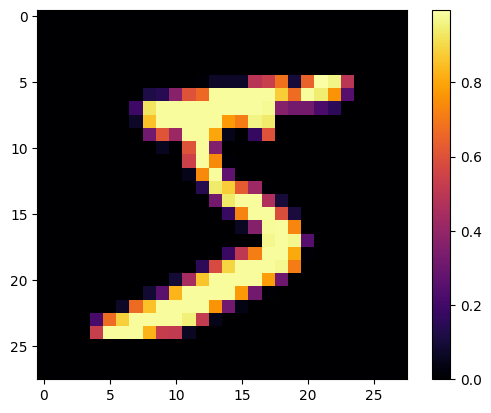

In [284]:
test_image = np.copy(mnist_train[0][0])
plt.imshow(test_image)
plt.set_cmap("inferno")
plt.colorbar()

In [285]:
model.set_mode(Mode.TEST)

In [286]:
# 99.49% confidence/probability that it's a 5
model.feedforward(np.array([test_image]))

array([[9.68114756e-10],
       [3.28580665e-07],
       [2.92086019e-08],
       [5.06305868e-03],
       [4.32868226e-11],
       [9.94936330e-01],
       [3.53513885e-09],
       [6.56138318e-08],
       [5.35230013e-08],
       [1.30297297e-07]])

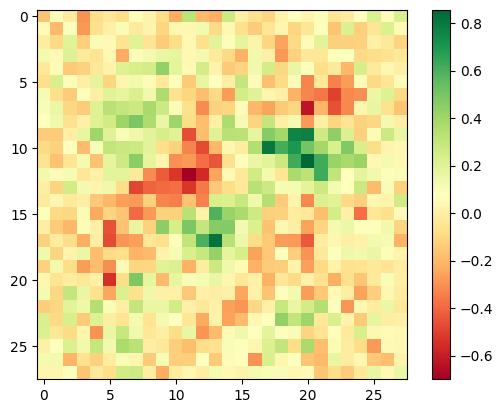

In [287]:
# Let's see how the model thinks it could become even more 5-like
model.set_cost(BinaryCrossEntropyCost())
desired_updates = -get_delta(model, test_image, vectorized_result(8))
plt.imshow(desired_updates)
plt.set_cmap("RdYlGn")
plt.colorbar()


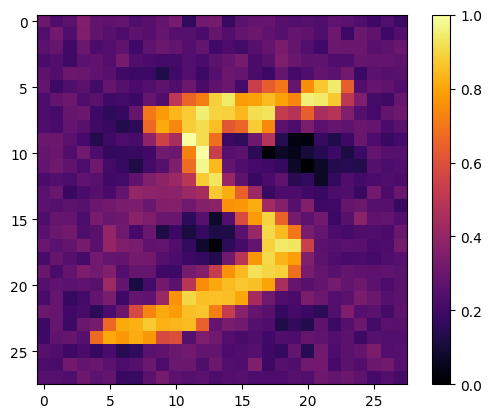

In [288]:
plt.imshow(normalize(test_image - 0.5 * desired_updates))
plt.set_cmap("inferno")
plt.colorbar()

In [289]:
model.feedforward(np.array([normalize(test_image - 0.5 * desired_updates)]))

array([[9.33084995e-07],
       [5.69607958e-08],
       [1.07991193e-06],
       [1.57365940e-03],
       [3.52015662e-10],
       [9.98413917e-01],
       [4.42764004e-07],
       [5.56188144e-09],
       [1.43867908e-06],
       [8.46647455e-06]])

In [290]:
def transform(image, target_number, n_steps, update_rate = 0.01, norm=forceNorm):
    for _ in range(n_steps):
        desired_upd = -get_delta(model, image, vectorized_result(target_number))
        desired_upd = desired_upd / np.max(np.abs(desired_updates))
        image = image + update_rate * desired_upd
        image = norm(image)
    return image

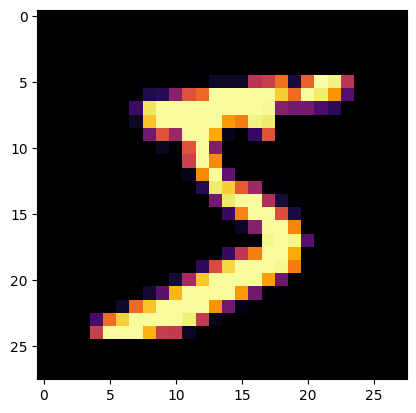

In [291]:
plt.imshow(test_image)

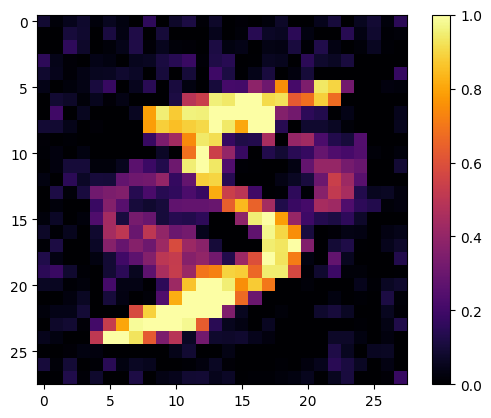

In [358]:
target_num = 0

strengthened_image = test_image
strengthened_image = transform(strengthened_image, target_num, 3000, update_rate=0.1, norm=pNorm)
strengthened_image = forceNorm(strengthened_image)
plt.set_cmap("inferno")
plt.imshow(strengthened_image)
plt.colorbar()

In [359]:
model.feedforward(np.array([strengthened_image]))

array([[9.99796017e-01],
       [1.73095268e-09],
       [1.52887250e-04],
       [1.19434462e-05],
       [1.90328780e-09],
       [1.65087075e-06],
       [5.17380645e-06],
       [6.88551924e-08],
       [2.70099193e-05],
       [5.24556436e-06]])

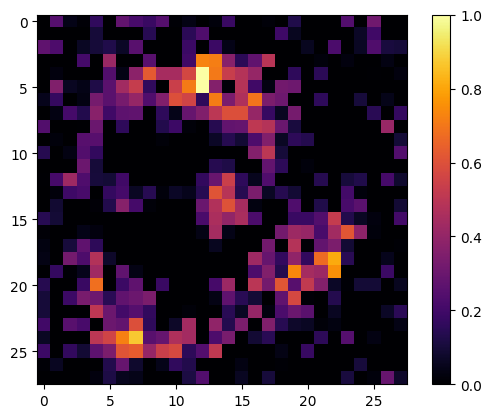

In [321]:
target_num = 3

random_image = 0.01 * np.ones((28, 28))
random_image = transform(random_image, target_num, 3000, norm=lambda x: forceNorm(x))
random_image = normalize(relu(random_image - 0.01))
plt.set_cmap("inferno")
plt.imshow(random_image)
plt.colorbar()

In [322]:
model.feedforward(np.array([random_image]))

array([[1.46995972e-10],
       [2.93679212e-08],
       [1.71126258e-08],
       [9.99999928e-01],
       [7.06089945e-11],
       [1.23259016e-08],
       [2.27475328e-12],
       [3.76686867e-09],
       [3.77761449e-10],
       [8.43438664e-09]])